In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [14]:
data = pd.read_csv('game.csv') 
print("Dataset Shape: ", data.shape)

data.head(10)

/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Shape:  (171907, 161)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
5,18710511,0,Thu,CH1,na,2,CL1,na,4,18,...,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,NaN,Y
6,18710513,0,Sat,WS3,na,2,CL1,na,5,12,...,Ezra Sutton,5.0,white104,Elmer White,9.0,bassj101,John Bass,6.0,NaN,Y
7,18710513,0,Sat,CH1,na,3,FW1,na,2,14,...,Ed Mincher,7.0,donnp101,Pete Donnelly,8.0,kellb105,Bill Kelly,9.0,NaN,Y
8,18710515,0,Mon,WS3,na,3,FW1,na,3,6,...,Ed Mincher,7.0,donnp101,Pete Donnelly,9.0,kellb105,Bill Kelly,8.0,NaN,Y
9,18710516,0,Tue,TRO,na,2,BS1,na,3,29,...,Fred Cone,7.0,spala101,Al Spalding,1.0,jacks101,Sam Jackson,8.0,HTBF,Y


In [15]:
data.drop(data.iloc[:,29:200], inplace = True, axis = 1)

In [16]:
res = data.drop(['date','number_of_game','day_of_week','v_name','v_league','v_game_number','h_name',
          'h_league','h_game_number','h_name','h_league','h_game_number',
          'length_outs','day_night','completion','forefeit','protest','park_id','attendance',
          'length_minutes','v_line_score','h_line_score'],axis=1)

In [17]:
res['Winner'] = res['h_score'] - res['v_score']

In [18]:
res['Winner'] = res['Winner'].apply(lambda x: 1 if x > 0 else 0)
res.head(20)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0,0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0,0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0,0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,1
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0,0


In [19]:
Data_Final = res.drop(['v_score','h_score'],axis=1)

In [20]:
Data_Final.head()

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0


In [21]:
df = Data_Final.replace([' ','NULL','na','(none)'],np.nan)

In [22]:
print(df.isin(['NaN']).mean())

v_at_bats            0.0
v_hits               0.0
v_doubles            0.0
v_triples            0.0
v_homeruns           0.0
v_rbi                0.0
v_sacrifice_hits     0.0
v_sacrifice_flies    0.0
Winner               0.0
dtype: float64


In [23]:
# drop any NaNs
df_2 = df.dropna()

In [24]:
df_2.dtypes

v_at_bats            float64
v_hits               float64
v_doubles            float64
v_triples            float64
v_homeruns           float64
v_rbi                float64
v_sacrifice_hits     float64
v_sacrifice_flies    float64
Winner                 int64
dtype: object

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split as tts

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [28]:
features = df_2[[ 'v_at_bats', 'v_hits', 'v_doubles','v_triples','v_homeruns',
                 'v_rbi','v_sacrifice_hits','v_sacrifice_flies']]

target = df_2[['Winner']].values.ravel()

In [30]:
X = df_2.iloc[:, :-1].values
y = df_2.iloc[:,-1].values

In [34]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [35]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
regressors = [
    SVR(),
    Lasso(),
    Ridge(),
    LinearSVR(),
    ElasticNet(),
    MLPRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]


In [42]:
def score_model(X, y, estimator):
    """
    Split the data into train and test splits and evaluate the mode
    """
    X_train, X_test, y_train, y_test = tts(X, y)
   
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print("{}: {}".format(estimator.__class__.__name__, r2_score(y_test, y_pred)))

In [43]:
for regressor in regressors:
    score_model(X, y, regressor)

SVR: 0.3051764115520089
Lasso: -6.581115108206248e-06
Ridge: 0.30472574951018383
LinearSVR: 0.2487671167862554
ElasticNet: 0.1653722312175262
MLPRegressor: 0.3231421261884685
KNeighborsRegressor: 0.21496430663573263
DecisionTreeRegressor: -0.0336245485771407
RandomForestRegressor: 0.21334730469618068


In [44]:
def visualize_model(X, y, estimator):
    """
    Visually evaluate the regressor's performance across the train and test data
    """
    X_train, X_test, y_train, y_test = tts(X, y)

    visualizer = ResidualsPlot(estimator)

    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()


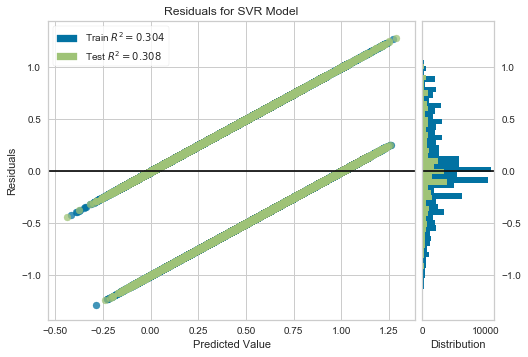

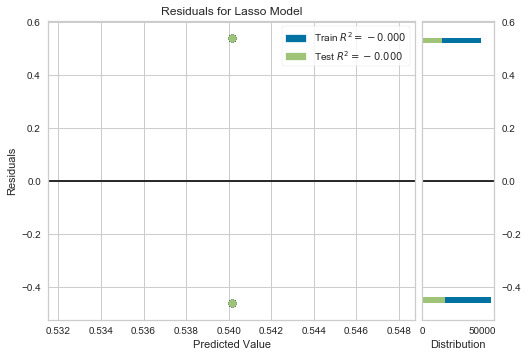

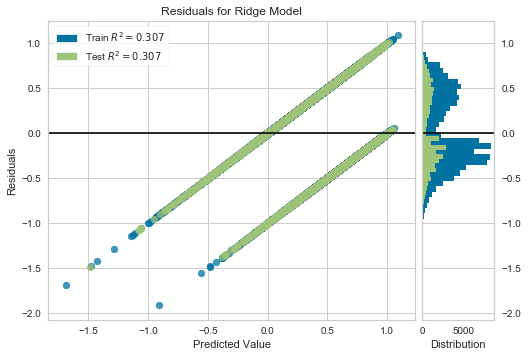

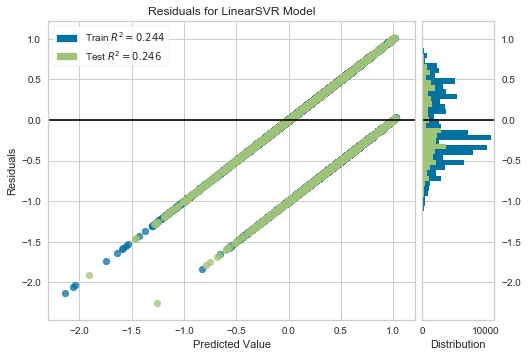

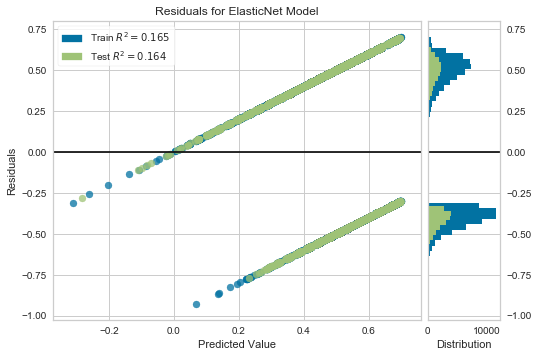

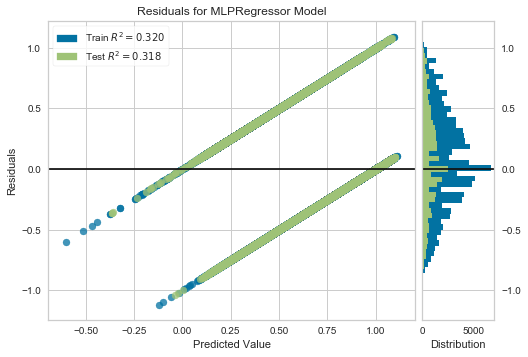

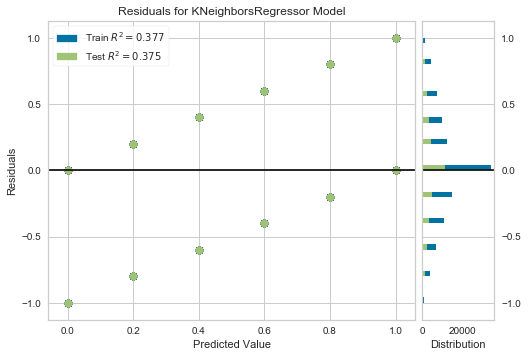

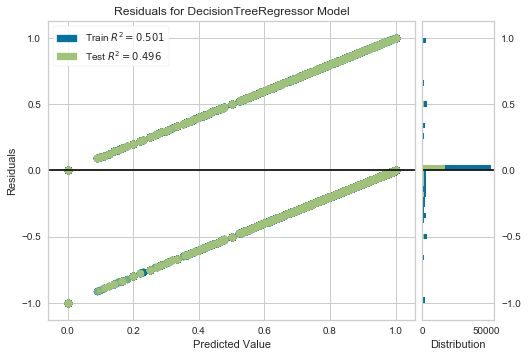

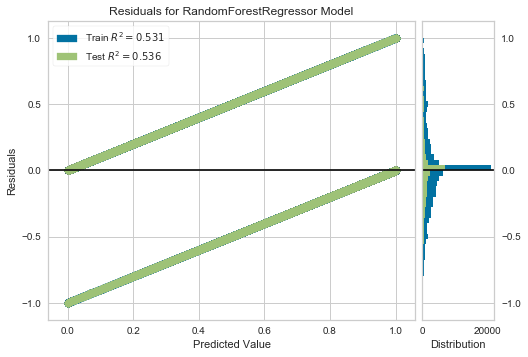

In [45]:
for regressor in regressors:
    visualize_model(X, y, regressor)

# Hyperparameter tuning 

In [61]:
features = df_2[[ 'v_at_bats', 'v_hits', 'v_doubles','v_triples','v_homeruns',
                 'v_rbi','v_sacrifice_hits','v_sacrifice_flies']]

target = df_2[['Winner']].values.ravel()

In [51]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [52]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [65]:
X = df_2.iloc[:, :-1]
y = df_2.iloc[:,-1]

In [66]:
X

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...
171902,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0
171903,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0
171904,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
171905,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0


In [67]:
X_2 = X.to_numpy()

In [69]:
X_2

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [68]:
y

0         1
1         0
2         0
3         1
4         0
         ..
171902    0
171903    1
171904    1
171905    1
171906    1
Name: Winner, Length: 140838, dtype: int64

In [70]:
y_2 = y.to_numpy()

In [71]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
import os
import pandas as pd

from yellowbrick.datasets import load_occupancy, load_energy, load_concrete

In [74]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [81]:
model = Lasso() # what does alpha default to? What happens when you change it?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', -0.0), ('v_hits', -0.0), ('v_doubles', -0.0), ('v_triples', -0.0), ('v_homeruns', -0.0), ('v_rbi', -0.0), ('v_sacrifice_hits', -0.0), ('v_sacrifice_flies', -0.0)]


In [82]:
model = Lasso(alpha=2) # What happens when you change the alpha parameter?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', -0.0), ('v_hits', -0.0), ('v_doubles', -0.0), ('v_triples', -0.0), ('v_homeruns', -0.0), ('v_rbi', -0.0), ('v_sacrifice_hits', -0.0), ('v_sacrifice_flies', -0.0)]


In [83]:
model = Lasso(alpha=200) # What happens when you change the alpha parameter?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', -0.0), ('v_hits', -0.0), ('v_doubles', -0.0), ('v_triples', -0.0), ('v_homeruns', -0.0), ('v_rbi', -0.0), ('v_sacrifice_hits', -0.0), ('v_sacrifice_flies', -0.0)]


In [84]:
model = Ridge() # What does alpha default to? What do the coefficients look like?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', 0.005893750284958084), ('v_hits', -0.011667112050602372), ('v_doubles', -0.003170451772700659), ('v_triples', -0.02194924275393427), ('v_homeruns', -0.01157923071107885), ('v_rbi', -0.07340740157159319), ('v_sacrifice_hits', -0.08917655289191528), ('v_sacrifice_flies', -0.024464859754968833)]


In [85]:
model = Ridge(alpha=20000) # What happens when you change the alpha parameter?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', 0.006381067133244314), ('v_hits', -0.014034658446577452), ('v_doubles', -0.0029090256102163024), ('v_triples', -0.015889221699823864), ('v_homeruns', -0.00907381968289723), ('v_rbi', -0.072309500163552), ('v_sacrifice_hits', -0.07369361328095263), ('v_sacrifice_flies', -0.013584284271239502)]


In [86]:
model = ElasticNet() # What does alpha default to? What do the coefficients look like?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', -0.0), ('v_hits', -0.001687663465775796), ('v_doubles', -0.0), ('v_triples', -0.0), ('v_homeruns', -0.0), ('v_rbi', -0.02953038245272302), ('v_sacrifice_hits', -0.0), ('v_sacrifice_flies', -0.0)]


In [87]:
model = ElasticNet(alpha=200) # What does alpha default to? What do the coefficients look like?
model.fit(X, y)
print(list(zip(X.columns, model.coef_.tolist())))

[('v_at_bats', -0.0), ('v_hits', -0.0), ('v_doubles', -0.0), ('v_triples', -0.0), ('v_homeruns', -0.0), ('v_rbi', -0.0), ('v_sacrifice_hits', -0.0), ('v_sacrifice_flies', -0.0)]


In [88]:
# We will use the Energy Efficiency dataset:

import pandas as pd
from sklearn.model_selection import GridSearchCV

# Change the path if needed.
X, y = load_energy()


In [89]:
model = Ridge(random_state=0)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_params = [{'alpha': alphas}]
n_folds = 5

grid = GridSearchCV(model, tuned_params, cv=n_folds)

grid.fit(X, y)
print(grid.best_estimator_)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)


In [91]:
 #Use GridSearchCV to see whether we need to tune any of the Ridge parameters.
model = Ridge(random_state=0)

# Create a dictionary with the Ridge parameter options
# We will explicitly tune our possible `solver` so that "auto" is not returned.
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True,False], 
              'normalize':[True,False], 'copy_X':[True, False], 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg']}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X, y)

print(clf.best_estimator_)


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='svd', tol=0.001)


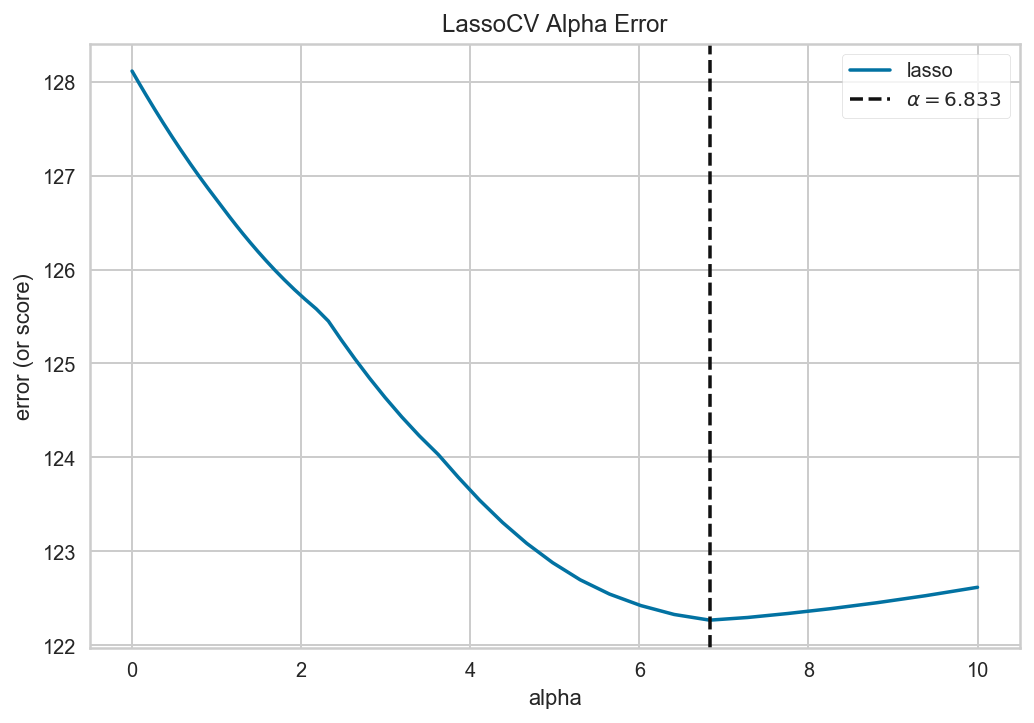

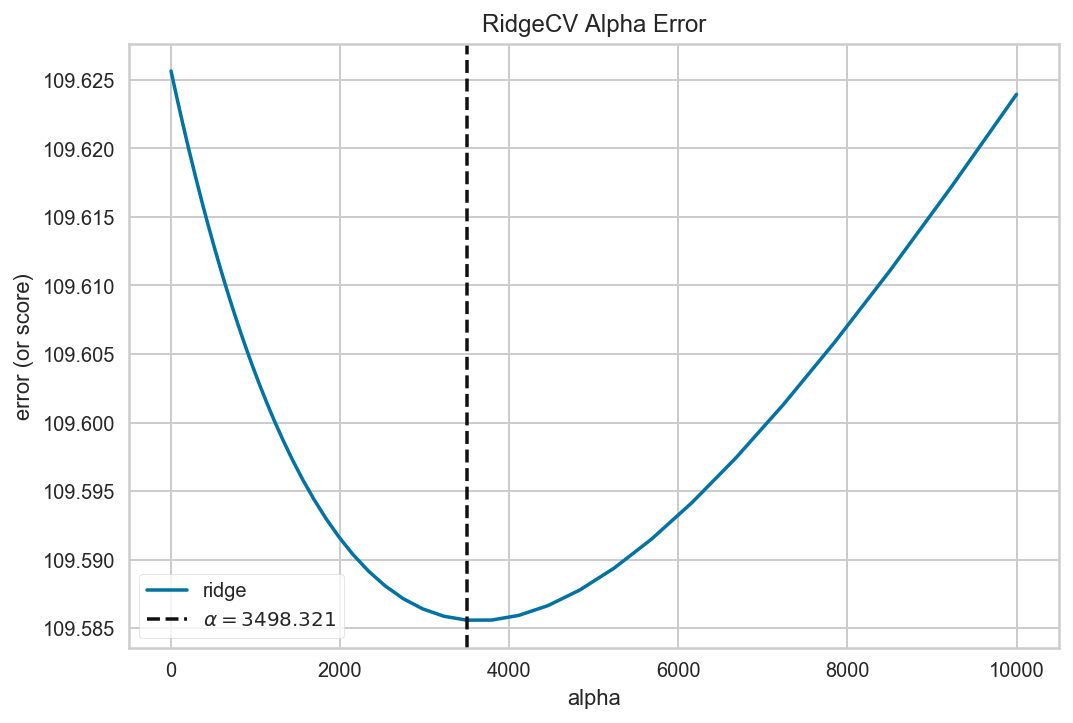

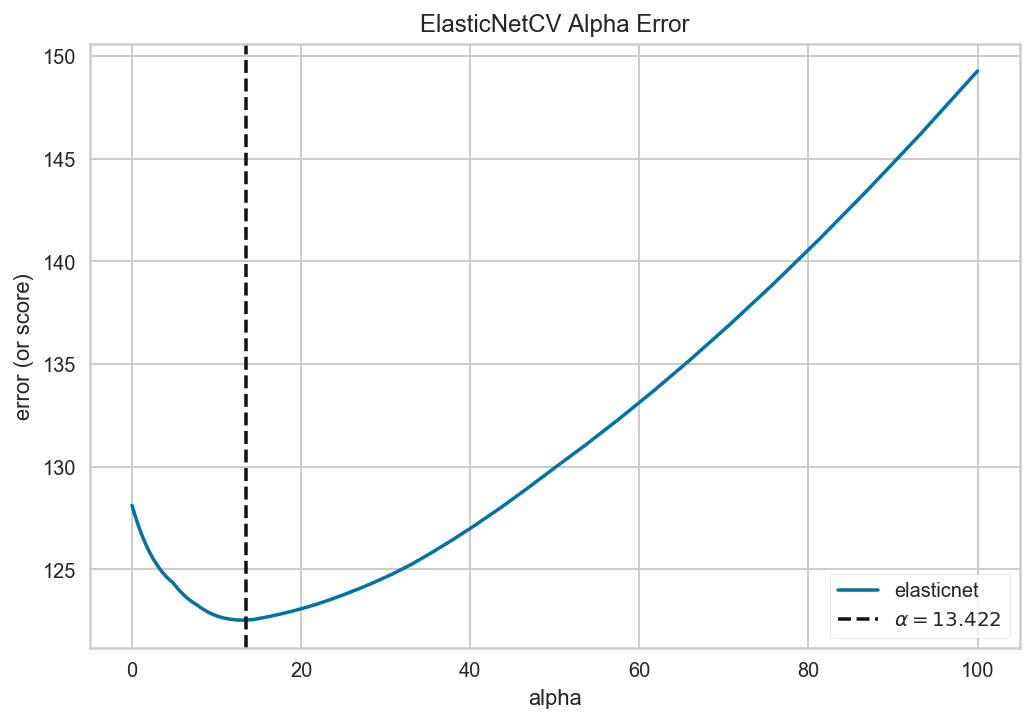

In [92]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

from yellowbrick.regressor import AlphaSelection

# Load the regression dataset
X, y = load_concrete()

# Create some lists of alphas to cross-validate against
small_range = np.logspace(-10, 1, 400)
medium_range = np.logspace(-10, 2, 400)
large_range = np.logspace(-10, 4, 400)

smoothers = {
    "Lasso": LassoCV(cv=5, alphas=small_range),
    "Ridge": RidgeCV(store_cv_values=True, alphas=large_range),
    "ElasticNet": ElasticNetCV(cv=5, alphas=medium_range)
}

for _, smoother in smoothers.items():
    _, ax = plt.subplots() # Create a new figure
    visualizer = AlphaSelection(smoother, size=(600, 400))
    visualizer.fit(X, y)
    visualizer.show()